<a href="https://colab.research.google.com/github/ALexTommy1223/Mayhoc/blob/main/Lab_7_20130278_H%E1%BB%93%20Nh%E1%BA%ADt%20Huy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab deals with **cross validation** for some classification algorithms and **clustering methods**. 

*   **Deadline: 23:59, 10/4/2023**



# Import libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/ML'

Mounted at /content/drive
/content/drive/MyDrive/ML


In [48]:
from sklearn.utils.fixes import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2
# import task2
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# import task3
from scipy.cluster import hierarchy
from math import dist

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


#Task 1. With **iris** dataset
*  1.1. Apply **SVM** algorithm with cross validation


In [24]:
#code
iris = datasets.load_iris()
X=iris.data
y=iris.target
model=svm.SVC(kernel='linear', C=1, random_state=0)
scores = cross_val_score(model, X, y,  scoring='accuracy', cv=5)
print("Accuary scores:", scores)
average_score=sum(scores)/len(scores)
print("Average accuracy score: ", average_score)

Accuary scores: [0.96666667 1.         0.96666667 0.96666667 1.        ]
Average accuracy score:  0.9800000000000001


*  1.2 Apply **feature selection** to the dataset and then use **RandomForest** algorithm with cross validation 

In [23]:
#code
iris = load_iris()
X = iris.data
y = iris.target
X_2 = SelectKBest(chi2, k=2).fit_transform(X, y)
rf = RandomForestClassifier(n_estimators=100, random_state=0)
scores = cross_val_score(rf, X_2, y, cv=5, scoring='accuracy')
print("Accuracy scores:", scores)
average_score = sum(scores)/len(scores)
print("Average accuracy score:", average_score)

Accuracy scores: [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
Average accuracy score: 0.96


#Task 2. With mnist dataset: 
*   2.1. Apply **K-Means** algorithm using k=10, 

In [43]:
dataset = datasets.load_iris()
kmeans = KMeans(n_clusters = 10, random_state = 0)
kmeans.fit(dataset.data)
clusters = kmeans.predict(dataset.data)
#kmeans.cluster_centers_.shape
clusters

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([5, 4, 4, 4, 5, 1, 4, 5, 4, 4, 1, 5, 4, 4, 1, 1, 1, 5, 1, 5, 5, 5,
       4, 5, 5, 4, 5, 5, 5, 4, 4, 5, 1, 1, 4, 4, 5, 5, 4, 5, 5, 4, 4, 5,
       5, 4, 5, 4, 5, 5, 8, 8, 8, 6, 8, 6, 8, 3, 8, 6, 3, 6, 6, 8, 6, 8,
       6, 6, 0, 6, 0, 6, 0, 8, 8, 8, 8, 8, 8, 3, 6, 3, 6, 0, 6, 8, 8, 8,
       6, 6, 6, 8, 6, 3, 6, 6, 6, 8, 3, 6, 2, 0, 7, 2, 2, 7, 6, 7, 2, 9,
       2, 0, 2, 0, 0, 2, 2, 9, 7, 0, 2, 0, 7, 0, 2, 7, 0, 0, 2, 7, 7, 9,
       2, 0, 0, 7, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

*   2.2. Compare the obtained result with with other classification algorithms such as **Randomforest**, **kNN**, and **Naïve Bayes** in terms of accuracy, precision, recall, f1 using cross validation. 


In [44]:
# code
from sklearn.metrics import accuracy_score
print (accuracy_score(dataset.target, clusters))


0.14666666666666667


*   2.3. From the obtained results, **which approach is better** for this problem: Supervised learning or Unsupervised learning?

In [45]:
#code
from sklearn.metrics.cluster import completeness_score
print (completeness_score(dataset.target, clusters))

0.4641860998775341


2.4. Apply **AgglomerativeClustering** algorithm to mnist dataset using the number of clusters is 10

In [46]:
from scipy.stats import mode
from sklearn.metrics import accuracy_score

labels = np.zeros_like(clusters)
print(labels)
for i in range(3):
  print(i, '------------------------------')
  mask = (clusters == i)
  print(mask)
  labels[mask] = mode(dataset.target[mask])[0]
  print(labels) 
accuracy_score(dataset.target, labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
0 ------------------------------
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False  True False
  True False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 Fal

<ipython-input-46-e04354d461dd>:10: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(dataset.target[mask])[0]


0.58

#Task 3. 
For given dataset (shopping-data.csv) including 5 attributes: **CustomerID**, **Genre**, **Age**, **Annual Income**, and **Spending Score**.
*   3.1. Using the **scipy library** to create the dendrograms for the given dataset (remember drop categorical attributes: **CustomerID**, **Genre**)





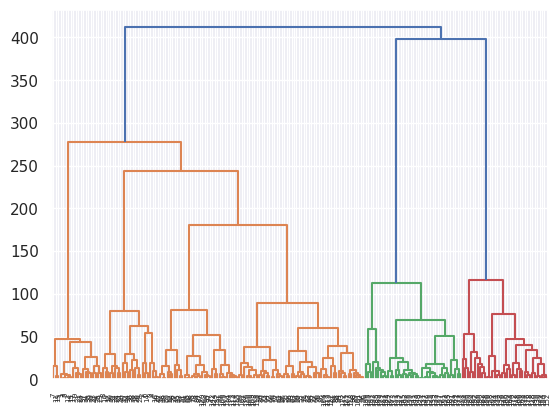

In [52]:

dataset= pd.read_csv('shopping-data.csv')
dataset= dataset.drop(['CustomerID', 'Genre'], axis=1)
dists= hierarchy.distance.pdist(dataset)
linkage= hierarchy.linkage(dists, method='ward')
hierarchy.dendrogram(linkage)
plt.show()

*   3.2. Apply K-Means to the preprocessed dataset with k belongs to [2,10]. Then compute SSE values and plot them to find the best value of k.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

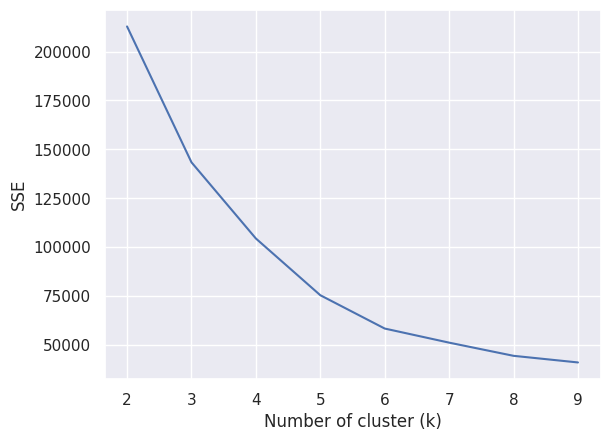

In [53]:
dataset= pd.read_csv('shopping-data.csv')
X= dataset.drop(['CustomerID','Genre'], axis=1)
k_range= range(2,10)
sse=[]
for k in k_range:
  kmeans= KMeans(n_clusters=k, random_state=0)
  kmeans.fit(X)
  sse.append(kmeans.inertia_)
plt.plot(k_range, sse)
plt.xlabel('Number of cluster (k)')
plt.ylabel('SSE')
plt.show()


*   3.2. From the obtained dengrograms, choose an appropriate number of clusters and apply **AgglomerativeClustering** algorithm to the given dataset

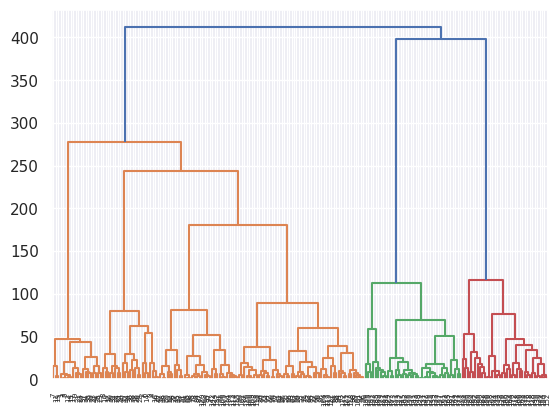

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [49]:


dataset = pd.read_csv('shopping-data.csv')
X = dataset.drop(['CustomerID', 'Genre'], axis=1)
Z = linkage(X, method='ward')
dendrogram(Z)
plt.show()
k = 3
model = AgglomerativeClustering(n_clusters=k, linkage='ward')
model.fit(X)
labels = model.labels_
print(labels)


#Finally,
Save a copy in your Github. Remember renaming the notebook.